In [1]:
import numpy as np
import os
import platform
import cv2
import matplotlib.pyplot as plt
import time

## Defined functions

In [2]:
def image2double(img):
    if (img.dtype != np.uint8):
        raise ValueError("ValueError exception thrown!\n \
                         \r\tInput img should be of dtype uint8.")
    return img.astype(float) / (np.iinfo(img.dtype).max - np.iinfo(img.dtype).min)
def image2uint8(img):
    if (img.dtype != float):
        raise ValueError("ValueError exception thrown!\n \
                         \r\tInput img should be of dtype float.")
    return (255*img).astype(np.uint8)

def display_images(img_fullname, img, img_reconstructed, psnr):
    h, w =  img.shape
    if (w < 250):
        h = h * 250//w 
        w = 250
        img = cv2.resize(img, dsize=(h, w))
        img_reconstructed = cv2.resize(img_reconstructed, dsize=(h, w))
    font = cv2.FONT_HERSHEY_SIMPLEX
    title_img = np.ones((30, 2*w+90))
    title_img =  cv2.putText(title_img, 'Original Image', (80, 20), font, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
    title_img_names = cv2.putText(title_img, 'Reconstructed Image', (2*w+90-245, 20), font, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
    title_img_psnr = cv2.putText(np.ones((30, 2*w+90)), f'PSNR: {psnr}', (20, 20), font, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
    
    img_or = np.concatenate((
                    np.concatenate((np.ones((h, 20)), img), axis=1), 
                    np.ones((h, 50)), 
                    np.concatenate((img_reconstructed, np.ones((h, 20))), axis=1)
                    ), 
                    axis=1
                    )
    
    img_or_t = np.concatenate((
                    title_img_names,
                    img_or,
                    title_img_psnr
                ),
                axis=0
            )
    
    plt.imshow(img_or_t, cmap='gray')
    plt.show()
    time.sleep(1)


## Database

In [3]:
slash = '\\' if platform.system() == 'Windows' else '/'

Destination  = f'.{slash}Output'
Input_images = f'.{slash}Database'
if not os.path.exists(Destination):
    os.makedirs(Destination)
    
# resize images to N x N
N = 100
print('Creating Database')
DB = []
DB_img_sizes = []
img_fullnames = os.listdir(Input_images)
for img_fullname in img_fullnames:
    img_itr = cv2.imread(f'{Input_images}{slash}{img_fullname}', cv2.IMREAD_GRAYSCALE)
    DB_img_sizes.append(img_itr.shape)
    img_itr = image2double(cv2.resize(img_itr, dsize=(N, N)))
    DB.append(img_itr.T.reshape((-1), ))
DB = np.array(DB)
print()
print(f"There are {len(img_fullnames)} images in the Database each of which has {N*N} pixels, then a variable DB of size [{len(img_fullnames)} x {N*N}] should be reserved.")
print()
print(f"Datebase of size {DB.shape}")
print(DB)

Creating Database

There are 10 images in the Database each of which has 10000 pixels, then a variable DB of size [10 x 10000] should be reserved.

Datebase of size (10, 10000)
[[0.29411765 0.30196078 0.30196078 ... 0.04313725 0.04313725 0.03921569]
 [0.22352941 0.2        0.23137255 ... 0.08627451 0.07058824 0.09019608]
 [0.00392157 0.01176471 0.02352941 ... 0.02352941 0.02745098 0.02745098]
 ...
 [0.18431373 0.18431373 0.18431373 ... 0.04313725 0.04705882 0.03921569]
 [0.23529412 0.23137255 0.23529412 ... 0.08627451 0.03529412 0.02352941]
 [0.2        0.21960784 0.23921569 ... 0.01568627 0.01960784 0.01960784]]


## Mean of columns in Dataset

In [4]:
# calculate and save mean of columns of DB.
print("Calculating and Saving mean of columns in DB.")
DB_mean = np.mean(DB, axis=0)
print()

print(f"Mean of columns in DB. This vetor has {DB_mean.size} elements")
print(DB_mean)
print()
print("Zero-ing mean of columns in DB")
DB = DB - DB_mean
print("Mean of columns in DB is now zero." \
      if not np.any(np.mean(DB, axis=0)>1e-15) else \
     "There seem to be a problem. please run the code again!")
print()
print("DB:")
print(DB)

Calculating and Saving mean of columns in DB.

Mean of columns in DB. This vetor has 10000 elements
[0.15137255 0.15411765 0.1627451  ... 0.04313725 0.03882353 0.04117647]

Zero-ing mean of columns in DB
Mean of columns in DB is now zero.

DB:
[[ 0.1427451   0.14784314  0.13921569 ...  0.          0.00431373
  -0.00196078]
 [ 0.07215686  0.04588235  0.06862745 ...  0.04313725  0.03176471
   0.04901961]
 [-0.14745098 -0.14235294 -0.13921569 ... -0.01960784 -0.01137255
  -0.01372549]
 ...
 [ 0.03294118  0.03019608  0.02156863 ...  0.          0.00823529
  -0.00196078]
 [ 0.08392157  0.0772549   0.07254902 ...  0.04313725 -0.00352941
  -0.01764706]
 [ 0.04862745  0.0654902   0.07647059 ... -0.02745098 -0.01921569
  -0.02156863]]


## Covariance of columns in DB results in a square matrix, in which element (i,j) is the covariance of ith column and jth column in DB.

In [5]:
print("Calculating covariance of columns in DB, to see how they change in regard to one another.\n")
Cov_DB = np.cov(DB.T)
print("Covariance of columns in DB:")
print(f"Shape of covariance of columns in DB is {Cov_DB.shape}")
print(Cov_DB)

Calculating covariance of columns in DB, to see how they change in regard to one another.

Covariance of columns in DB:
Shape of covariance of columns in DB is (10000, 10000)
[[8.56832842e-03 8.70126874e-03 8.84446153e-03 ... 1.24225725e-03
  4.76056218e-04 2.25554274e-04]
 [8.70126874e-03 9.25814858e-03 9.36306549e-03 ... 1.04233414e-03
  3.54222735e-04 2.13593062e-05]
 [8.84446153e-03 9.36306549e-03 9.59032851e-03 ... 1.10214020e-03
  3.81904396e-04 1.01670298e-04]
 ...
 [1.24225725e-03 1.04233414e-03 1.10214020e-03 ... 6.86915289e-04
  3.31496433e-04 4.06681191e-04]
 [4.76056218e-04 3.54222735e-04 3.81904396e-04 ... 3.31496433e-04
  2.92024435e-04 4.17788030e-04]
 [2.25554274e-04 2.13593062e-05 1.01670298e-04 ... 4.06681191e-04
  4.17788030e-04 6.80934683e-04]]


# Eigen Vectors and Eigen Values

In [6]:
print('Calculating Eigen Vectors and Eigen Values')
[eigenValues, eigenVectors] = np.linalg.eigh(Cov_DB)
print("Sorting eigen vectors by the magnitude of their corresponding eigen value.")
sort_index     = eigenValues.argsort()[::-1] # Descending Order
eigenValues    = eigenValues[sort_index]
eigenVectors   = eigenVectors[:, sort_index]
print()
print(f"Eigen values of size {eigenValues.size}: \n{eigenValues}")
print()
print(f"corresponding eigen vectors of shape {eigenVectors.shape}: \n{eigenVectors}")


Calculating Eigen Vectors and Eigen Values
Sorting eigen vectors by the magnitude of their corresponding eigen value.

Eigen values of size 10000: 
[ 6.50394927e+01  2.71408894e+01  1.71244132e+01 ... -3.23338228e-14
 -3.72874984e-14 -4.32433343e-14]

corresponding eigen vectors of shape (10000, 10000): 
[[-7.04297265e-03  8.43688607e-03  3.28988007e-03 ... -1.75037858e-03
  -1.51028079e-03  1.30659431e-02]
 [-5.86510056e-03  1.02031611e-02  2.58288168e-03 ... -1.81540598e-01
   1.06560346e-02 -6.84093238e-01]
 [-6.17873505e-03  1.10395899e-02  3.09345191e-03 ...  3.74972807e-01
   2.16501767e-01 -1.66696610e-01]
 ...
 [-1.29293001e-03 -1.80447755e-05  2.19629154e-03 ... -1.22218797e-03
   5.11299420e-04  3.69199411e-03]
 [-5.06990609e-04  3.64690993e-04 -1.17315516e-03 ... -3.31168423e-04
  -9.21695562e-04  1.12911524e-03]
 [-6.29803042e-04  2.80487668e-04 -2.37855010e-03 ... -1.80835804e-04
   1.38479266e-03  8.07831670e-04]]


## A closer look at eigen values

First 15 elements of eigen values:
[6.50394927e+01 2.71408894e+01 1.71244132e+01 1.20220617e+01
 8.27653172e+00 7.22661127e+00 6.12116151e+00 4.43882441e+00
 2.72851732e+00 3.69450108e-14 3.06181149e-14 2.85979208e-14
 2.66930379e-14 2.31198516e-14 2.26845319e-14]
Dividing each eigen value by the next one, to see how each element changes:
[2.39636556e+00 1.58492376e+00 1.42441568e+00 1.45254826e+00
 1.14528531e+00 1.18059477e+00 1.37900510e+00 1.62682655e+00
 7.38534720e+13 1.20663897e+00 1.07064130e+00 1.07136253e+00
 1.15455058e+00 1.01919016e+00 1.25848273e+00]

Maximum change happens after the 9th element of eigen values: 2.728517318589099


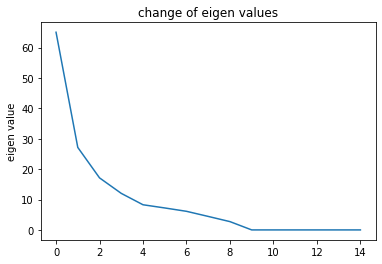

In [7]:
print(f"First 15 elements of eigen values:\n{eigenValues[:15]}")
eigenValues_divide_by_next = np.true_divide(eigenValues[:-1], eigenValues[1:])
print(f"Dividing each eigen value by the next one, to see how each element changes:\n{eigenValues_divide_by_next[:15]}")
print()
print(f"Maximum change happens after the {np.argmax(eigenValues_divide_by_next)+1}th element of eigen values: {eigenValues[np.argmax(eigenValues_divide_by_next)]}")

plt.figure(1)
plt.plot(eigenValues[:15])
plt.ylabel("eigen value")
plt.title("change of eigen values")
plt.show()

## Extraction of Feature Vectors and Feature Values 

In [8]:
featureVectors = eigenVectors[:, :np.argmax(eigenValues_divide_by_next)+1]
featureValues  = eigenValues[:np.argmax(eigenValues_divide_by_next)+1]
print()
print(f"Eigen values that are kept of size {featureValues.size}: \n{featureValues}")
print()
print(f"Corresponding eigen vectors of shape {featureVectors.shape}: \n{featureVectors}")


Eigen values that are kept of size 9: 
[65.03949274 27.1408894  17.12441323 12.02206171  8.27653172  7.22661127
  6.12116151  4.43882441  2.72851732]

Corresponding eigen vectors of shape (10000, 9): 
[[-7.04297265e-03  8.43688607e-03  3.28988007e-03 ...  1.28256494e-02
   7.37432459e-03  8.38406584e-04]
 [-5.86510056e-03  1.02031611e-02  2.58288168e-03 ...  1.46102122e-02
   1.32182214e-02 -3.35221091e-03]
 [-6.17873505e-03  1.10395899e-02  3.09345191e-03 ...  1.33310962e-02
   1.22943600e-02 -4.78352081e-03]
 ...
 [-1.29293001e-03 -1.80447755e-05  2.19629154e-03 ...  6.03158452e-04
  -5.49071321e-03 -3.50906512e-03]
 [-5.06990609e-04  3.64690993e-04 -1.17315516e-03 ... -8.95560290e-04
  -4.93153249e-03 -1.19176085e-03]
 [-6.29803042e-04  2.80487668e-04 -2.37855010e-03 ... -2.59041633e-03
  -8.35807744e-03 -4.54668580e-03]]


In [9]:
print(f"DB of shape {DB.shape} is manipulated in way that its unimportant elements are discarded, and then transformed into a new space by multiplying by its essential eigen vectors.")
print()
DB_Principal_components = np.matmul(DB, featureVectors)
print(f"DB after removing it's unimportant vectors: \nshape of new DB is {DB_Principal_components.shape}\n{DB_Principal_components}")

DB of shape (10, 10000) is manipulated in way that its unimportant elements are discarded, and then transformed into a new space by multiplying by its essential eigen vectors.

DB after removing it's unimportant vectors: 
shape of new DB is (10, 9)
[[-1.25631626e+01  6.40226717e+00 -3.14349292e+00  2.52261323e+00
   2.79349624e+00 -2.98121030e+00  2.03666646e+00  5.77197115e-02
   7.48923649e-01]
 [-1.08751028e+01  2.78836280e+00 -2.81557748e-01 -3.00502673e+00
  -3.75244282e-01  4.36800971e+00 -3.28611941e+00 -1.89942686e+00
  -1.19741251e-01]
 [ 9.24545707e+00  4.46915230e-01  1.43761314e-01  6.86712203e+00
   1.16563439e+00  3.60348489e+00  8.80471927e-01 -1.62709434e+00
   6.82117446e-01]
 [ 7.10730414e+00  4.87890148e+00  1.55978444e+00  4.39906957e-02
   2.26739479e+00 -3.73522243e-01 -3.35297866e+00  3.94613127e+00
  -9.32673478e-01]
 [ 7.75345479e+00  1.83646213e+00 -1.91664265e+00 -2.10003389e+00
  -1.86228215e-01 -2.44108442e+00  5.92489102e-01 -3.03981869e+00
  -3.09125653e+

## Reconstruction of images out the lossy compression of DB

In [10]:
DB_Reconstructed = np.matmul(DB_Principal_components, featureVectors.T) + DB_mean
print(f"Reconstructing DB by again multiplying it by essential eigen vectors to transform it back to the original space.")
print()
print(f"Reconstructed DB of shape {DB_Reconstructed.shape}: \n{DB_Reconstructed}")
print("De-zero-ing mean of the original DB")
DB = DB + DB_mean

Reconstructing DB by again multiplying it by essential eigen vectors to transform it back to the original space.

Reconstructed DB of shape (10, 10000): 
[[0.29411765 0.30196078 0.30196078 ... 0.04313725 0.04313725 0.03921569]
 [0.22352941 0.2        0.23137255 ... 0.08627451 0.07058824 0.09019608]
 [0.00392157 0.01176471 0.02352941 ... 0.02352941 0.02745098 0.02745098]
 ...
 [0.18431373 0.18431373 0.18431373 ... 0.04313725 0.04705882 0.03921569]
 [0.23529412 0.23137255 0.23529412 ... 0.08627451 0.03529412 0.02352941]
 [0.2        0.21960784 0.23921569 ... 0.01568627 0.01960784 0.01960784]]
De-zero-ing mean of the original DB


## Comparison of the original DB and the reconstructed DB

1.jpg 	psnr:  354.748773987937


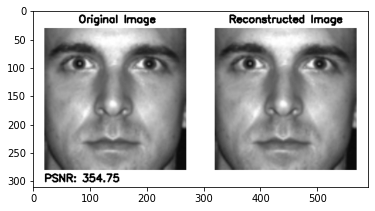

10.jpg 	psnr:  353.6111403724675


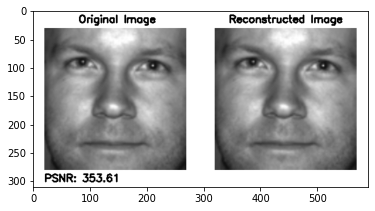

2.jpg 	psnr:  354.4935118485406


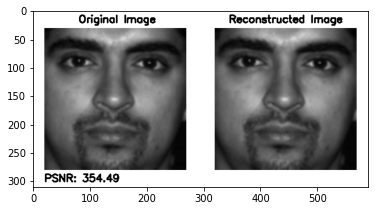

3.jpg 	psnr:  356.36825590050466


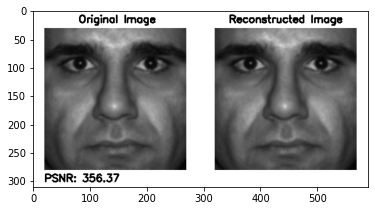

4.jpg 	psnr:  356.3152735002682


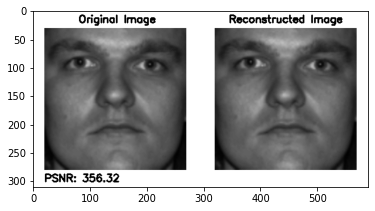

5.jpg 	psnr:  355.77590891808416


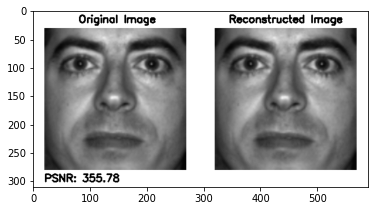

6.jpg 	psnr:  356.09604272590354


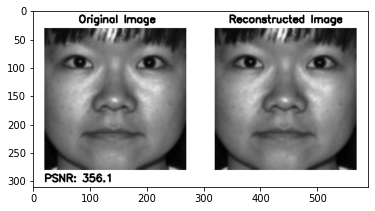

7.jpg 	psnr:  355.44349758607916


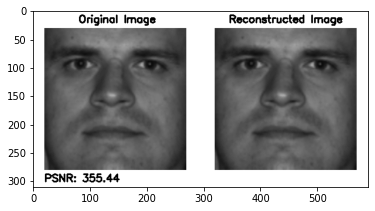

8.jpg 	psnr:  355.6873667912209


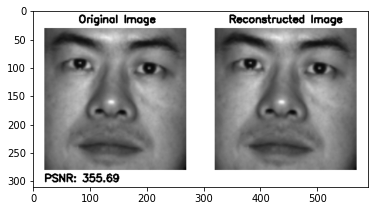

9.jpg 	psnr:  357.42034156902025


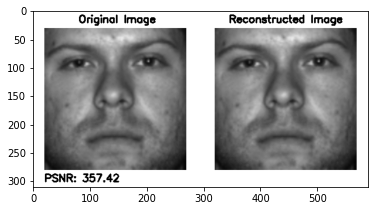

In [11]:
for indx, img_fullname in enumerate(img_fullnames):
    h, w = DB_img_sizes[indx]
    # Original image
    img = np.reshape(DB[indx, :], (N, N)).T
    img = cv2.resize(img, dsize=(h, w))
    # Reconstructed image
    img_reconstructed = np.reshape(DB_Reconstructed[indx, :], (N, N)).T
    img_reconstructed = cv2.resize(img_reconstructed, dsize=(h, w))

    # Calculating psnr, peak signal-to-noise ratio, to have a quantivative comparison of images
    psnr = cv2.PSNR(img, img_reconstructed)
    print(img_fullname, '\tpsnr: ', psnr)

    display_images(img_fullname, img, img_reconstructed, round(psnr, 2))



## What if we intentionally included less eigen vectors and discarded part of the essential data 

Zero-ing mean of the original DB
Manually picking 1 essential eigen vectors for the transformation into a new space.

Eigen values that are kept of size 1: 
[65.03949274]

Corresponding eigen vectors of shape (10000, 1): 
[[-0.00704297]
 [-0.0058651 ]
 [-0.00617874]
 ...
 [-0.00129293]
 [-0.00050699]
 [-0.0006298 ]]

DB of shape (10, 10000) is manipulated in way that its unimportant, and in this case partially important, elements are discarded, and then transformed into a new space by multiplying it by the non-discarded eigen vectors.

DB after removing it's unimportant, and in this case partially important, vectors: 
shape of new DB is (1, 10)
[[-12.56316255 -10.87510281   9.24545707   7.10730414   7.75345479
   -2.37241005  -1.14534396   9.06197032  -4.65386462  -1.55830233]]

Reconstructing DB by again multiplying it by non-discarded eigen vectors to transform it back to the original space.

Reconstructed DB of shape (10, 10000): 
[[0.23985456 0.22780186 0.24036955 ... 0.05938054 0.

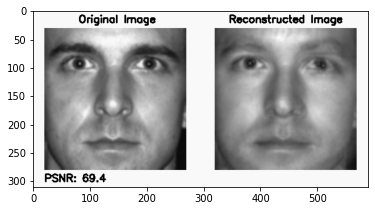

10.jpg 	psnr:  71.43389156580687


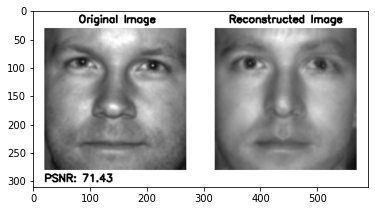

2.jpg 	psnr:  70.17811973603202


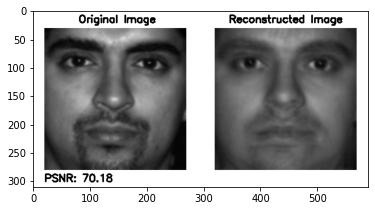

3.jpg 	psnr:  70.65960576257925


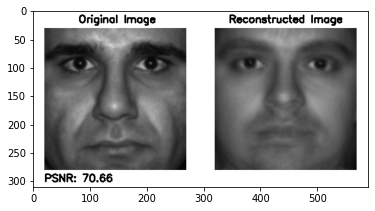

4.jpg 	psnr:  72.78474736329943


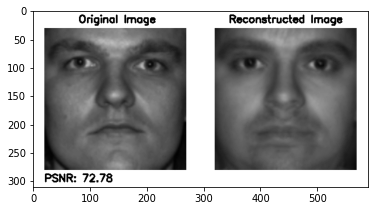

5.jpg 	psnr:  69.68568107251743


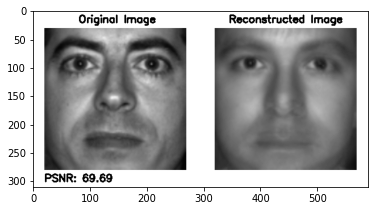

6.jpg 	psnr:  65.80905909937266


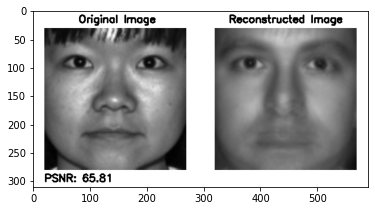

7.jpg 	psnr:  71.80319567114614


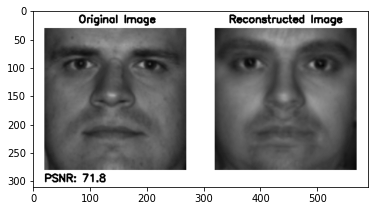

8.jpg 	psnr:  67.6432928874841


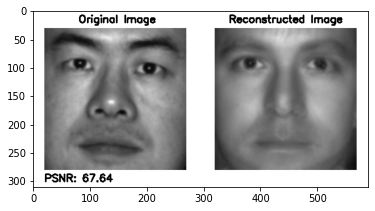

9.jpg 	psnr:  70.69980587444951


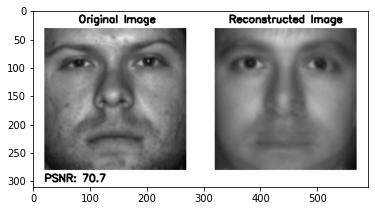

In [12]:
# zeroing DB again
print("Zero-ing mean of the original DB")
DB = DB - DB_mean

p = 1
print(f"Manually picking {p} essential eigen vectors for the transformation into a new space.")
newFeatureVectors = eigenVectors[:, :p]
newFeatureValues  = eigenValues[:p]
print()
print(f"Eigen values that are kept of size {newFeatureValues.size}: \n{newFeatureValues}")
print()
print(f"Corresponding eigen vectors of shape {newFeatureVectors.shape}: \n{newFeatureVectors}")
print()
print(f"DB of shape {DB.shape} is manipulated in way that its unimportant, and in this case partially important, elements are discarded, and then transformed into a new space by multiplying it by the non-discarded eigen vectors.")
print()
newDB_Principal_components = np.matmul(DB, newFeatureVectors)
print(f"DB after removing it's unimportant, and in this case partially important, vectors: \nshape of new DB is {newDB_Principal_components.T.shape}\n{newDB_Principal_components.T}")
print()
print(f"Reconstructing DB by again multiplying it by non-discarded eigen vectors to transform it back to the original space.")
newDB_Reconstructed = np.matmul(newDB_Principal_components, newFeatureVectors.T) + DB_mean
print()
print(f"Reconstructed DB of shape {newDB_Reconstructed.shape}: \n{newDB_Reconstructed}")
print()
print("De-zero-ing mean of the original DB")
DB = DB + DB_mean
print()

for indx, img_fullname in enumerate(img_fullnames):
    h, w = DB_img_sizes[indx]
    # Original image
    img = np.reshape(DB[indx, :], (N, N)).T
    img = cv2.resize(img, dsize=(h, w))
    # Reconstructed image
    img_newReconstructed = np.reshape(newDB_Reconstructed[indx, :], (N, N)).T
    img_newReconstructed = cv2.resize(img_newReconstructed, dsize=(h, w))

    # Calculating psnr, peak signal-to-noise ratio, to have a quantivative comparison of images
    psnr = cv2.PSNR(img, img_newReconstructed)
    print(img_fullname, '\tpsnr: ', psnr)

    display_images(img_fullname, img, img_newReconstructed, round(psnr, 2))


In [33]:
newDB_Reconstructed_zeromean = np.matmul(newDB_Principal_components, newFeatureVectors.T)
def are_elements_equal(a: np.array):
    a = a.reshape((-1))
    return np.all((a - a[0])<1e-15)
for i in range(newDB_Reconstructed_zeromean.shape[0]-1):
    newDBi2newDBj = newDB_Reconstructed_zeromean[0]/ newDB_Reconstructed_zeromean[i+1]
    
    if are_elements_equal(newDBi2newDBj):
        print(f"Reconstructed image number {i+2:02d} is equal to reconstructed image number {1:02d} multiplied by a scalar")
        
    

Reconstructed image number 02 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 03 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 04 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 05 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 06 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 07 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 08 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 09 is equal to reconstructed image number 01 multiplied by a scalar
Reconstructed image number 10 is equal to reconstructed image number 01 multiplied by a scalar
